## Import

In [109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import seaborn as sns 
#import gc
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import sklearn

import os
import warnings
warnings.filterwarnings('ignore')

import pickle
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

import time
import operator
import missingno
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.inspection import permutation_importance
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option

In [36]:
import pandas as pd  
data = pd.read_csv(r'traindata.csv', sep=',')
pd.options.display.max_columns = None
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RHOB,GR,NPHI,DTC,SP,BS,ROP,DCAL,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.884186,80.200851,NaN,161.131180,24.612379,NaN,34.636410,NaN,-0.574928,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.889794,79.262886,NaN,160.603470,23.895531,NaN,34.636410,NaN,-0.570188,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.896523,74.821999,NaN,160.173615,23.916357,NaN,34.779556,NaN,-0.574245,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.891913,72.878922,NaN,160.149429,23.793688,NaN,39.965164,NaN,-0.586315,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.880034,71.729141,NaN,160.128342,24.104078,NaN,57.483765,NaN,-0.597914,65000,1.0


In [37]:
data= data.drop(columns=['WELL','X_LOC','Y_LOC','Z_LOC','GROUP','CALI','DTC','SP','BS','ROP','DCAL','DRHO','FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE','RSHA'])

In [38]:
list(data.columns)

['DEPTH_MD', 'FORMATION', 'RHOB', 'GR', 'NPHI']

In [39]:
data.isna().sum()

DEPTH_MD         0
FORMATION    36066
RHOB          6402
GR               0
NPHI         10482
dtype: int64

<AxesSubplot:>

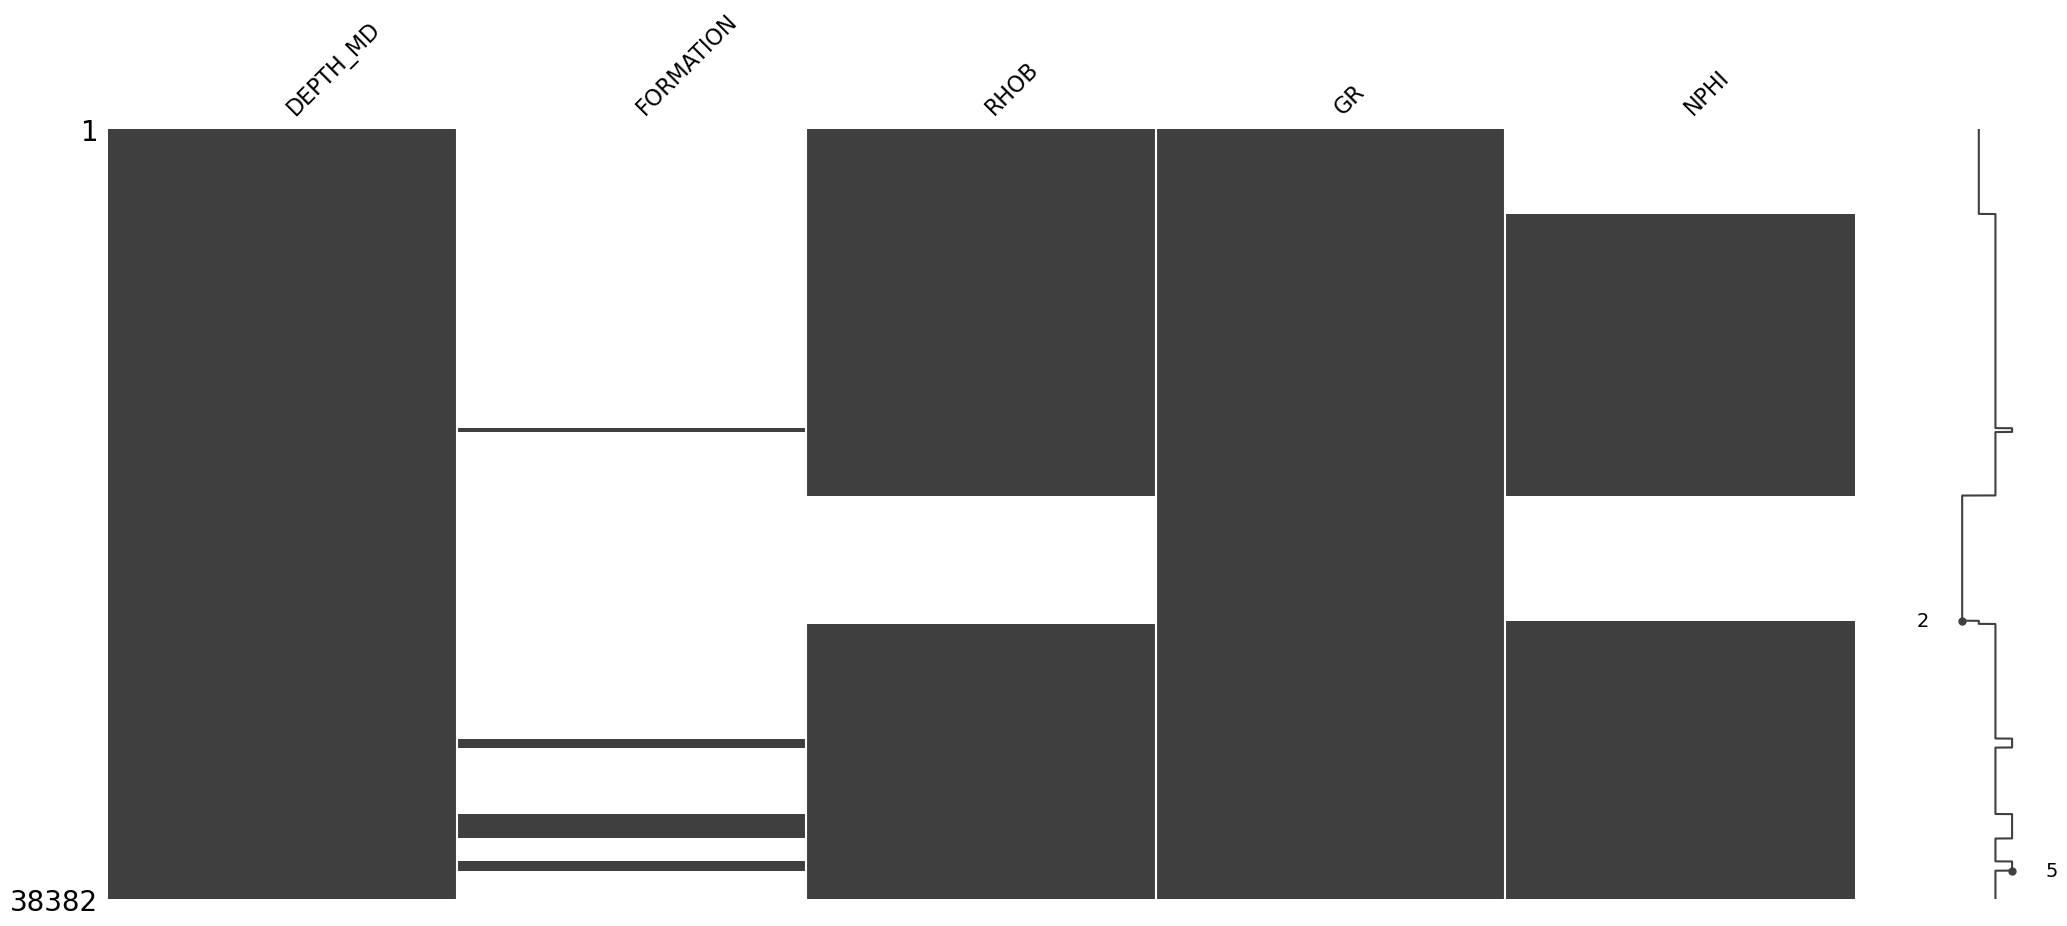

In [40]:
missingno.matrix(data)

In [41]:
data['FORMATION'] = np.where(data['FORMATION'].isna(), 0, data['FORMATION'])

In [42]:
data['FORMATION'].unique()

array([0, 'Heather Fm.', 'Hugin Fm.', 'Ekofisk Fm.'], dtype=object)

In [43]:
data.head()

,DEPTH_MD,FORMATION,RHOB,GR,NPHI
0,494.528,0,1.884186,80.200851,NaN
1,494.680,0,1.889794,79.262886,NaN
2,494.832,0,1.896523,74.821999,NaN
3,494.984,0,1.891913,72.878922,NaN
4,495.136,0,1.880034,71.729141,NaN


In [44]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution")

    fig.tight_layout()  
    plt.show()

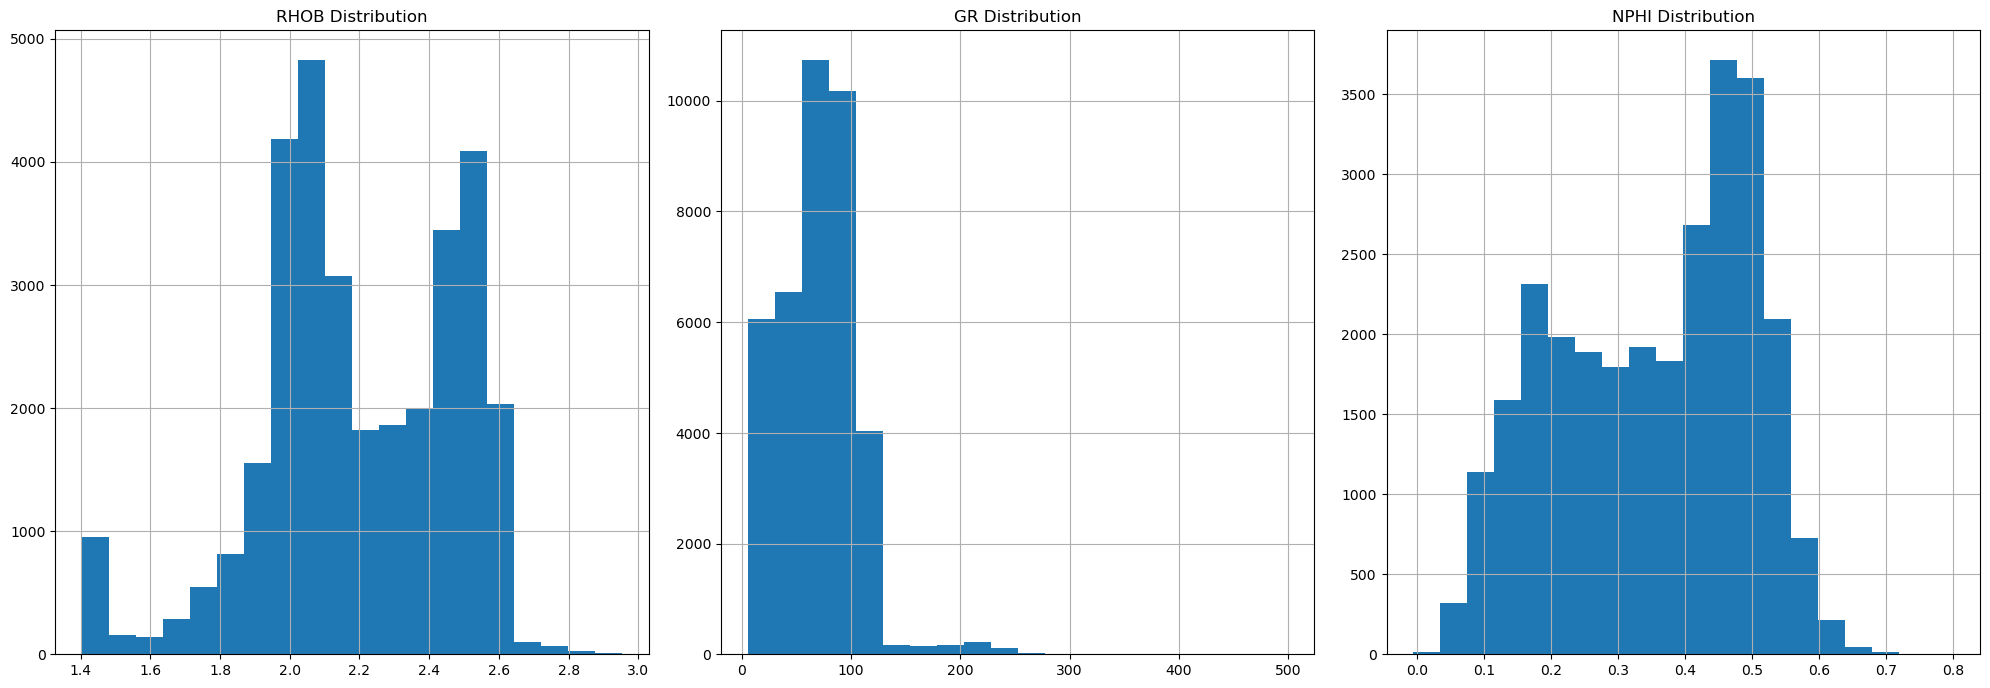

In [45]:
histograms_plot(data,data[['RHOB','GR','NPHI']].columns,3,3)

In [46]:
data.isna().sum()

DEPTH_MD         0
FORMATION        0
RHOB          6402
GR               0
NPHI         10482
dtype: int64

In [47]:
data.describe()

,DEPTH_MD,RHOB,GR,NPHI
count,38382.000000,31980.000000,38382.000000,27900.000000
mean,1904.792463,2.194891,70.038539,0.353819
std,812.779323,0.280848,34.961406,0.142869
min,439.415790,1.404576,5.782680,-0.005300
25%,1196.175947,2.015528,44.481265,0.228855
50%,1925.411895,2.163349,71.158260,0.379428
75%,2654.951842,2.455034,92.222841,0.475087
max,3272.024000,2.952480,499.022583,0.800262


In [48]:
data['RHOB'] = np.where(data['RHOB'].isna(), 2.194891, data['RHOB'])

In [49]:
data.isna().sum()

DEPTH_MD         0
FORMATION        0
RHOB             0
GR               0
NPHI         10482
dtype: int64

In [56]:
data = data[data['NPHI'].notna()]

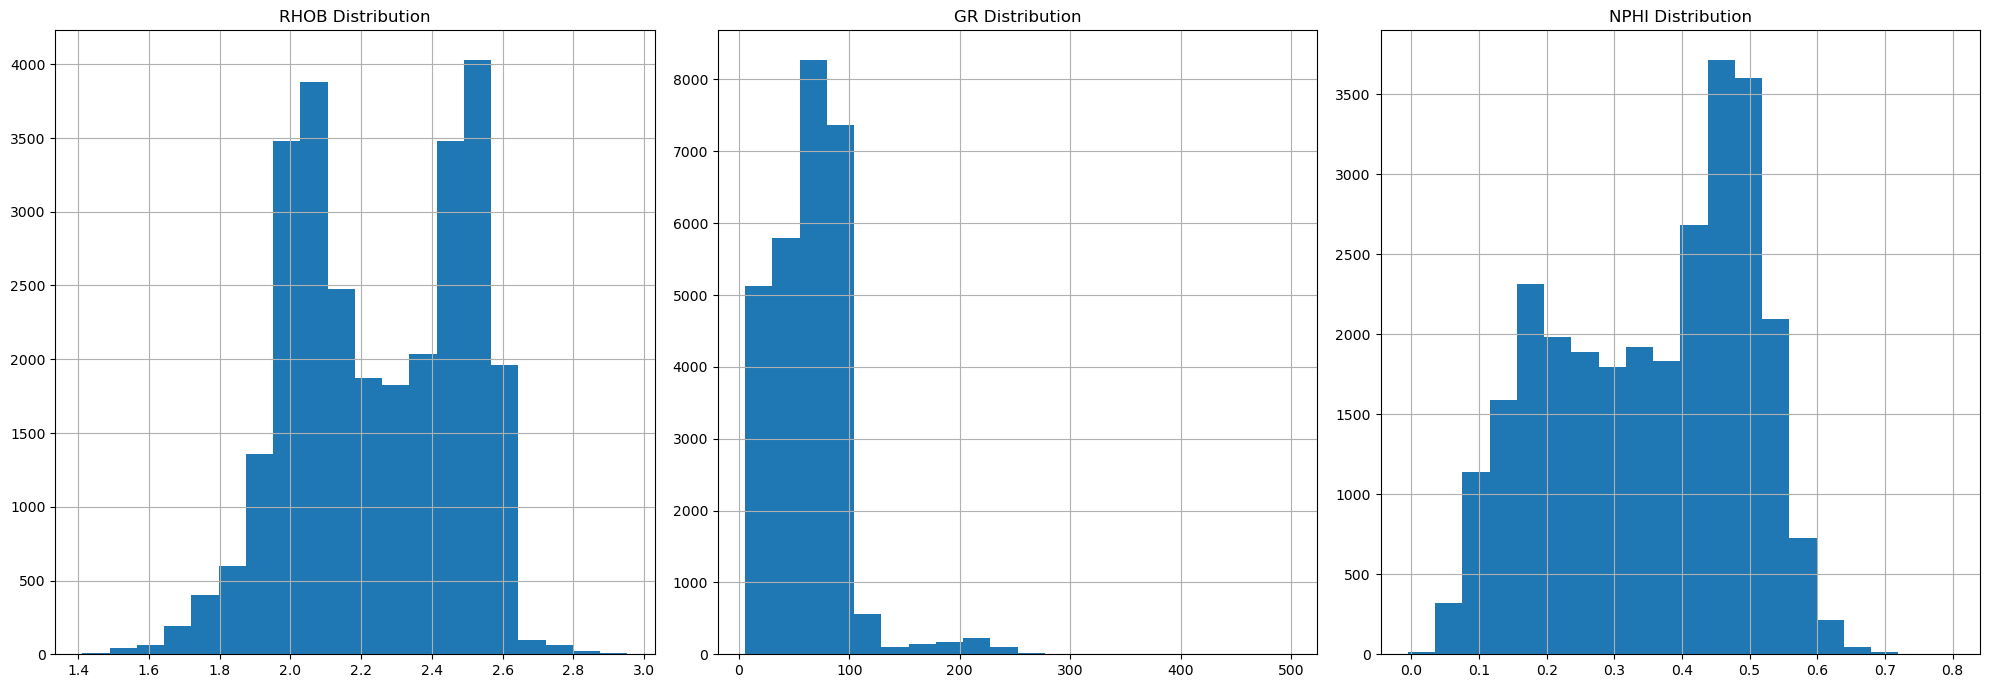

In [57]:
histograms_plot(data,data[['RHOB','GR','NPHI']].columns,3,3)

In [58]:
len(data)

27900

<AxesSubplot:>

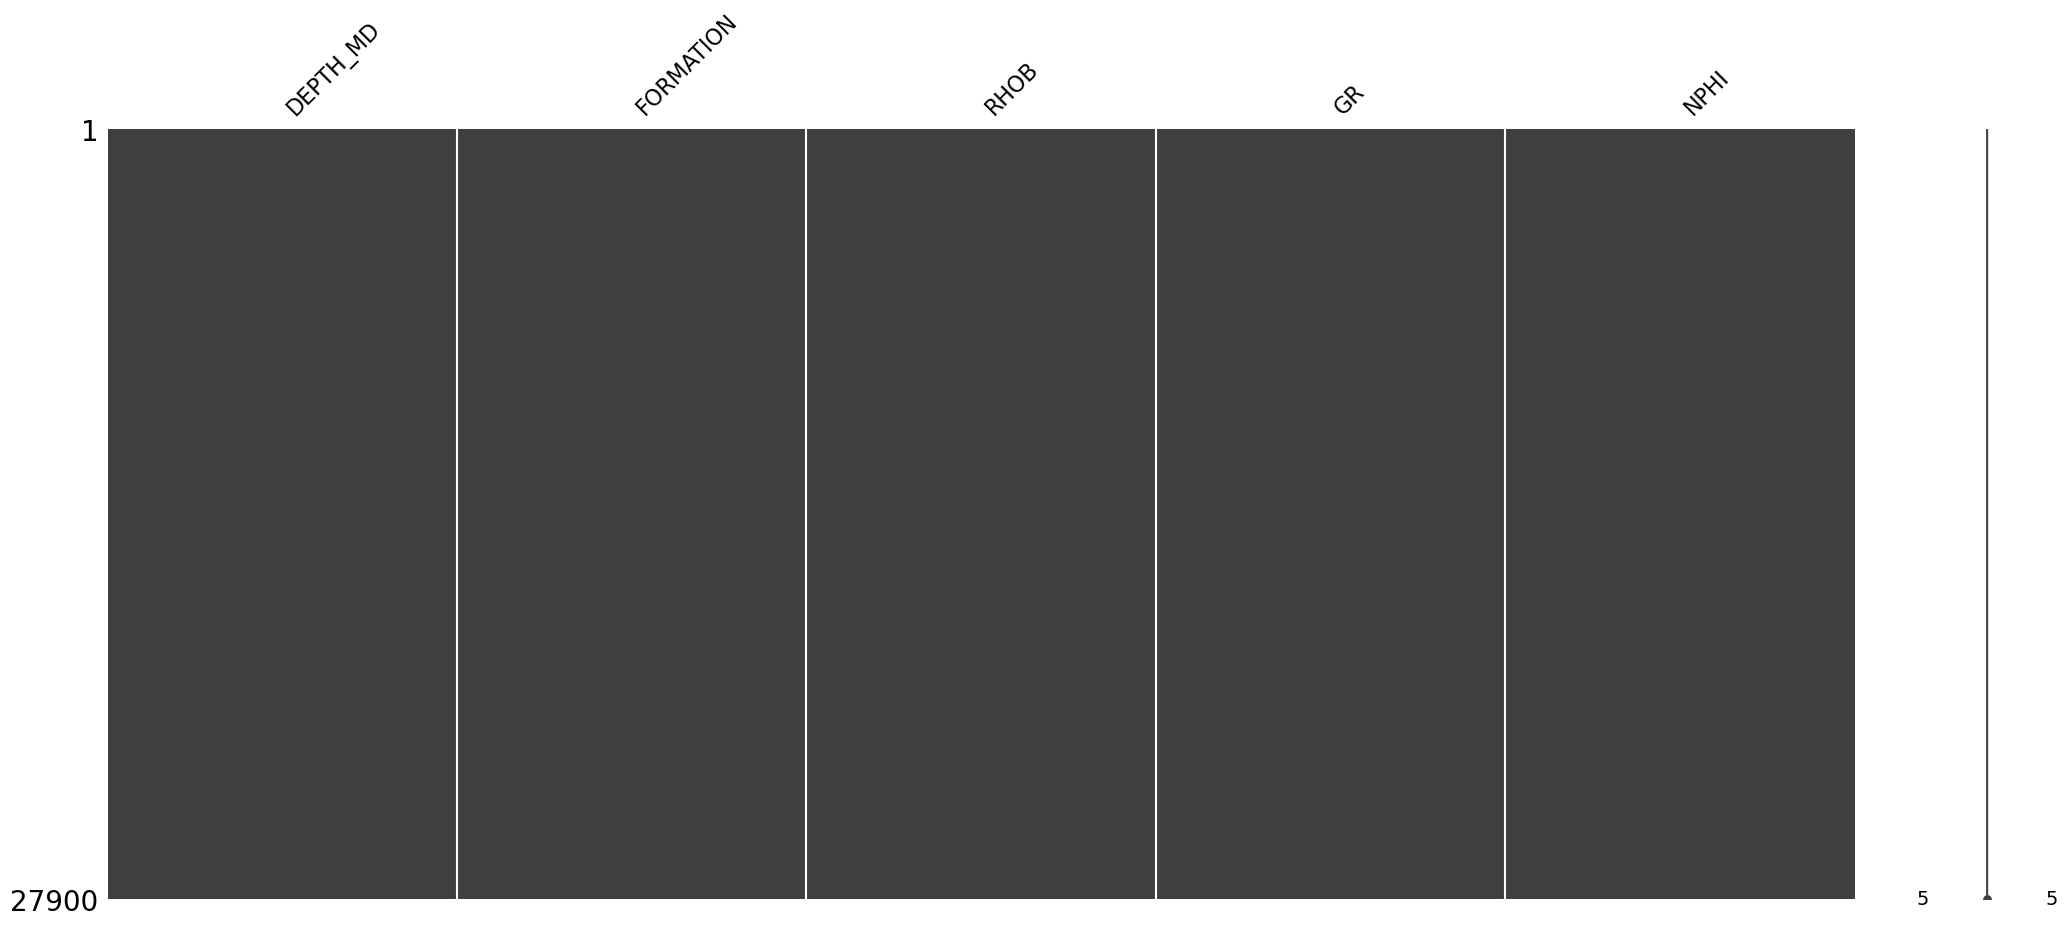

In [59]:
missingno.matrix(b_data)

In [60]:
data.head()

,DEPTH_MD,FORMATION,RHOB,GR,NPHI
4238,1138.704,0,1.774626,55.892757,0.765867
4239,1138.856,0,1.800986,60.929138,0.800262
4240,1139.008,0,1.817696,62.117264,0.765957
4241,1139.160,0,1.829333,61.010860,0.702521
4242,1139.312,0,1.813854,58.501236,0.639708


In [67]:
#y = data.drop(columns=['FORMATION'])
data['FORMATION'].unique()

array([0, 'Heather Fm.', 'Hugin Fm.', 'Ekofisk Fm.'], dtype=object)

In [68]:
formation_numbers = {0: 0,
                 'Heather Fm.': 1,
                 'Hugin Fm.': 2,
                 'Ekofisk Fm.': 3}

In [69]:
data['FORMATION'] = data['FORMATION'].map(formation_numbers)
data.head()

,DEPTH_MD,FORMATION,RHOB,GR,NPHI
4238,1138.704,0,1.774626,55.892757,0.765867
4239,1138.856,0,1.800986,60.929138,0.800262
4240,1139.008,0,1.817696,62.117264,0.765957
4241,1139.160,0,1.829333,61.010860,0.702521
4242,1139.312,0,1.813854,58.501236,0.639708


In [70]:
data['FORMATION'].unique()

array([0, 1, 2, 3], dtype=int64)

In [71]:
data1 = data

## Split Data

In [73]:
X = data1.drop(columns=['FORMATION'])

In [74]:
X

,DEPTH_MD,RHOB,GR,NPHI
4238,1138.704000,1.774626,55.892757,0.765867
4239,1138.856000,1.800986,60.929138,0.800262
4240,1139.008000,1.817696,62.117264,0.765957
4241,1139.160000,1.829333,61.010860,0.702521
4242,1139.312000,1.813854,58.501236,0.639708
...,...,...,...,...
38377,3136.929202,2.330812,47.910629,0.268916
38378,3137.081202,2.333778,47.535816,0.268218
38379,3137.233202,2.312559,46.608562,0.264366
38380,3137.385202,2.274340,48.267384,0.266614


In [77]:
y = data1['FORMATION']

In [78]:
print(X.shape, y.shape)

(27900, 4) (27900,)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22320, 4) (5580, 4) (22320,) (5580,)


## First Model

In [85]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [86]:
ypredict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, predict)
print('MAE: %.3f' % mae)

MAE: 0.014


## Second Model

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [163]:
#make a copy 
dt = data1

In [148]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=50,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    y,
                    callbacks=[es],
                    epochs=20, # you can set this to a big number!
                    batch_size=5,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 16)                336       
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
18/18 [==============================] - 1s 20ms/step - loss: 0.6688 - accuracy: 0.3222 - val_loss: 0.6351 - val_accuracy: 0.5000
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.3788 - accuracy: 0.3444 - val_loss: 0.5639 - val_accuracy: 0.4000
Epoch 3/20
18/18 [====================

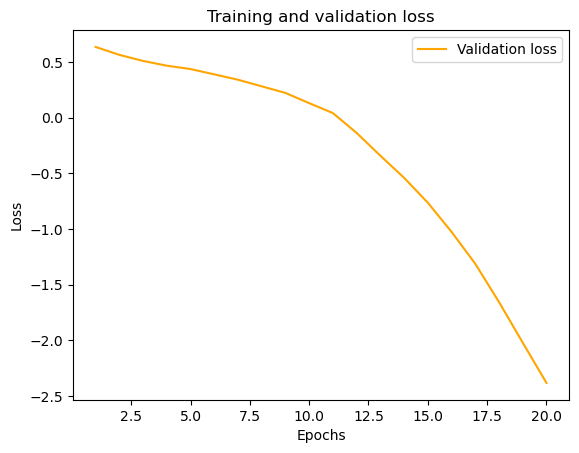

In [175]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

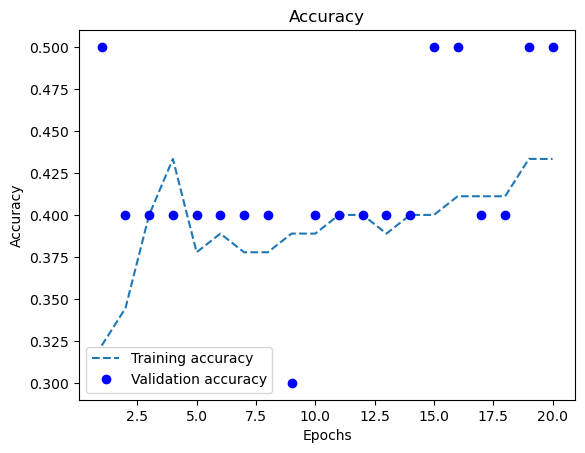

0.5

In [190]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, linestyle = 'dashed', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),1) # 1 and 0 (survival or not)
y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(y, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y, preds))
##               precision    recall  f1-score   support
## 
##            0       0.82      0.89      0.86       549
##            1       0.80      0.69      0.74       340
## 
##     accuracy                           0.82       889
##    macro avg       0.81      0.79      0.80       889
## weighted avg       0.81      0.82      0.81       889

4/4 [==============================] - 0s 3ms/step
[[15 19  0]
 [ 4 29  0]
 [ 1 32  0]]
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        34
           1       0.36      0.88      0.51        33
           2       0.00      0.00      0.00        33

    accuracy                           0.44       100
   macro avg       0.37      0.44      0.36       100
weighted avg       0.37      0.44      0.36       100



## Third Attempt

In [164]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [167]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [168]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Forth Attempt

In [106]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [107]:
predicted_labels = clf.predict(X_test)

In [108]:
def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth

    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")

    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)
    
                  
def display_adj_cm(
        cm, labels, adjacent_facies, hide_zeros=False, 
        display_metrics=False):
    """This function displays a confusion matrix that counts 
       adjacent facies as correct.
    """
    adj_cm = np.copy(cm)
    
    for i in np.arange(0,cm.shape[0]):
        for j in adjacent_facies[i]:
            adj_cm[i][i] += adj_cm[i][j]
            adj_cm[i][j] = 0.0
        
    display_cm(adj_cm, labels, hide_zeros, 
                             display_metrics)

In [112]:
formation_labels = ['0', '1', '2', '3']

In [113]:
conf = confusion_matrix(y_test, predicted_labels)
display_cm(conf, formation_labels, hide_zeros=True)

     Pred     0     1     2     3 Total
     True
        0  5106                    5106
        1   198                     198
        2   179                     179
        3    97                      97


In [114]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [125]:
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
pd.DataFrame(data=decoded_predictions, columns=['formation']).to_csv('predictions.csv', index=False)

In [118]:
list(data1.columns)

['DEPTH_MD', 'FORMATION', 'RHOB', 'GR', 'NPHI']

In [123]:
from fastai.tabular import core
import xgboost as xgb

In [126]:
def formation_decode(formation_array):
    inverse_formation_map = { value : key for key, value in formation_numbers.items() }
    return np.vectorize(inverse_formation_map.get)(formation_array)

In [127]:
decoded_result = formation_decode(predicted_labels)

In [128]:
pd.DataFrame(data=decoded_result).to_csv('predictions.csv', index=False)